In [233]:
import pandas as pd
import plotly.express as px
import nltk
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
pd.options.display.max_colwidth = 10000
#2020-11-02-01

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ozgekaracam/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Vader on our dataset

In [235]:
# Change path to directory with files
file = '../Project/us-election-2020-tweets/cleantweets.csv'
df = pd.read_csv(file, sep=';', on_bad_lines='skip').dropna(subset=['state'])
df['text'] = df['text'].str.lower()

/var/folders/z5/8gb5zsq90kz9zvv3q5_7tkhw0000gn/T/ipykernel_2827/2691998772.py:3: DtypeWarning:

Columns (0,3,5) have mixed types. Specify dtype option on import or set low_memory=False.



In [236]:
len(df)

9447802

In [63]:
# Check terms
df_trump = df[df['text'].str.contains('trump')]
df_biden = df[df['text'].str.contains('biden')]

In [110]:
df_trump

,id,text,retweet_count,favorite_count,date,verified,state,sentiment_scores,sentiment
1,1319111212194549761,rt @realdonaldtrump: just don’t see any way nancy pelosi and cryin’ chuck schumer will be willing to do what is right for our great america…,17984.0,0,10-22-03,False,Pennsylvania,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.6249}",Positive
2,1319111212672667648,rt @ddale8: it turns out trump has been making this false claim for seven years now https://t.co/s17ibtqg6c https://t.co/6nnunlaehq,462.0,0,10-22-03,False,New Jersey,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral
5,1319111212831887360,"rt @amy_siskind: note every bit of foreign interference has been to help trump and hurt biden. \n\nnote every bit of voter intimidation, vote…",694.0,0,10-22-03,False,Colorado,"{'neg': 0.215, 'neu': 0.692, 'pos': 0.093, 'compound': -0.5423}",Negative
6,1319111212853022721,"rt @donwinslow: hunter biden is not responsible for the deaths of 220,000 americans.\n\nbut donald trump is.",5215.0,0,10-22-03,False,Massachusetts,"{'neg': 0.085, 'neu': 0.915, 'pos': 0.0, 'compound': -0.1232}",Negative
20,1319111221858193408,"rt @cnnpolitics: republican sen. mitt romney: ""i did not vote for president trump"" https://t.co/nyiqfto31d https://t.co/wlumvhydrl",1155.0,0,10-22-03,False,Florida,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral
...,...,...,...,...,...,...,...,...,...
9447824,1323369262308753408,rt @watchchad: hollywood released a list of celebrities leaving if trump wins. \n\ni’ve compiled a list of people who give a damn:\n\n1.,1380.0,0,11-02-20,False,California,"{'neg': 0.111, 'neu': 0.738, 'pos': 0.152, 'compound': 0.25}",Positive
9447827,1323369265978843138,@bestsongiheard i blame trump,0.0,1,11-02-20,False,Indiana,"{'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'compound': -0.34}",Negative
9447828,1323369266045980675,rt @kasie: just a scathing column from gop lawyer ben ginsberg — calling trump tactics “un- american”:\n\n“proof of systematic fraud has beco…,707.0,0,11-02-20,False,Texas,"{'neg': 0.16, 'neu': 0.84, 'pos': 0.0, 'compound': -0.5859}",Negative
9447830,1323369266117332992,@theonion you guys at the onion have to try harder. this one is entirely believable.\n\ni feel bad for you - you're lucky that trump hasn't completely put you out of business!,0.0,3,11-02-20,False,Pennsylvania,"{'neg': 0.116, 'neu': 0.803, 'pos': 0.08, 'compound': -0.3084}",Negative


In [111]:
df_biden

,id,text,retweet_count,favorite_count,date,verified,state,sentiment_scores,sentiment
5,1319111212831887360,"rt @amy_siskind: note every bit of foreign interference has been to help trump and hurt biden. \n\nnote every bit of voter intimidation, vote…",694.0,0,10-22-03,False,Colorado,"{'neg': 0.215, 'neu': 0.692, 'pos': 0.093, 'compound': -0.5423}",Negative
6,1319111212853022721,"rt @donwinslow: hunter biden is not responsible for the deaths of 220,000 americans.\n\nbut donald trump is.",5215.0,0,10-22-03,False,Massachusetts,"{'neg': 0.085, 'neu': 0.915, 'pos': 0.0, 'compound': -0.1232}",Negative
9,1319111213368881153,#soeakupvotebiden \ni voted biden at my clerk's office. #michigan\n#vote https://t.co/gran5h2rzs,0.0,2,10-22-03,False,Michigan,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral
11,1319111217332416512,"rt @jackposobiec: the fbi just confirmed iran ran a false flag campaign to help joe biden by posing as the proud boys \n\nmany, many members…",6779.0,0,10-22-03,False,Nevada,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.7003}",Positive
16,1319111221472333824,"rt @kylegriffin1: billy graham's granddaughter has endorsed joe biden.\n\n""the jesus we serve promotes kindness, dignity, humility, and this…",5967.0,0,10-22-03,False,Florida,"{'neg': 0.0, 'neu': 0.598, 'pos': 0.402, 'compound': 0.8442}",Positive
...,...,...,...,...,...,...,...,...,...
9447817,1323369258521251840,rt @timcast: i think its funny that people across the country are preparing for mass leftist riots and would also vote for joe biden whose…,4103.0,0,11-02-20,False,North Dakota,"{'neg': 0.117, 'neu': 0.78, 'pos': 0.103, 'compound': -0.1027}",Negative
9447820,1323369262099189763,rt @jimtankersley: a key diff for dems in 2020 vs. 2016: joe biden has quietly kept both his left flank and wall st from rebelling against…,130.0,0,11-02-20,True,Georgia,"{'neg': 0.08, 'neu': 0.92, 'pos': 0.0, 'compound': -0.2732}",Negative
9447821,1323369262141054976,rt @realdonaldtrump: biden will raise your taxes (biggest increase ever!).,12175.0,0,11-02-20,False,Illinois,"{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'compound': 0.3802}",Positive
9447831,1323369266251444233,rt @joebiden: are you still undecided about who to vote for or know someone who is? my team put together some cheat sheets to show where do…,18719.0,0,11-02-20,False,Maine,"{'neg': 0.164, 'neu': 0.836, 'pos': 0.0, 'compound': -0.5994}",Negative


In [67]:
# Run the sentiment analysis on each state for trump and biden
def sentimentVerdict(sentiment):
    if sentiment['compound'] >= 0.05:
        return "Positive"
    elif sentiment['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"
    
df_biden['sentiment_scores'] = df_biden['text'].apply(lambda x: sid.polarity_scores(x))
df_biden['sentiment'] = df_biden['sentiment_scores'].apply(lambda x: sentimentVerdict(x))
df_trump['sentiment_scores'] = df_trump['text'].apply(lambda x: sid.polarity_scores(x))
df_trump['sentiment'] = df_trump['sentiment_scores'].apply(lambda x: sentimentVerdict(x)) 

/var/folders/z5/8gb5zsq90kz9zvv3q5_7tkhw0000gn/T/ipykernel_2827/1663378363.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_biden['sentiment_scores'] = df_biden['text'].apply(lambda x: sid.polarity_scores(x))
/var/folders/z5/8gb5zsq90kz9zvv3q5_7tkhw0000gn/T/ipykernel_2827/1663378363.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_biden['sentiment'] = df_biden['sentiment_scores'].apply(lambda x: sentimentVerdict(x))
/var/folders/z5/8gb5zsq90kz9zvv3q5_7tkhw0000gn/T/ipykernel_2827/1663378363.py:

In [70]:
df_biden.head()

,id,text,retweet_count,favorite_count,date,verified,state,sentiment_scores,sentiment
5,1319111212831887360,"rt @amy_siskind: note every bit of foreign interference has been to help trump and hurt biden. \n\nnote every bit of voter intimidation, vote…",694.0,0,10-22-03,False,Colorado,"{'neg': 0.215, 'neu': 0.692, 'pos': 0.093, 'compound': -0.5423}",Negative
6,1319111212853022721,"rt @donwinslow: hunter biden is not responsible for the deaths of 220,000 americans.\n\nbut donald trump is.",5215.0,0,10-22-03,False,Massachusetts,"{'neg': 0.085, 'neu': 0.915, 'pos': 0.0, 'compound': -0.1232}",Negative
9,1319111213368881153,#soeakupvotebiden \ni voted biden at my clerk's office. #michigan\n#vote https://t.co/gran5h2rzs,0.0,2,10-22-03,False,Michigan,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral
11,1319111217332416512,"rt @jackposobiec: the fbi just confirmed iran ran a false flag campaign to help joe biden by posing as the proud boys \n\nmany, many members…",6779.0,0,10-22-03,False,Nevada,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.7003}",Positive
16,1319111221472333824,"rt @kylegriffin1: billy graham's granddaughter has endorsed joe biden.\n\n""the jesus we serve promotes kindness, dignity, humility, and this…",5967.0,0,10-22-03,False,Florida,"{'neg': 0.0, 'neu': 0.598, 'pos': 0.402, 'compound': 0.8442}",Positive


In [71]:
df_trump.head()

,id,text,retweet_count,favorite_count,date,verified,state,sentiment_scores,sentiment
1,1319111212194549761,rt @realdonaldtrump: just don’t see any way nancy pelosi and cryin’ chuck schumer will be willing to do what is right for our great america…,17984.0,0,10-22-03,False,Pennsylvania,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.6249}",Positive
2,1319111212672667648,rt @ddale8: it turns out trump has been making this false claim for seven years now https://t.co/s17ibtqg6c https://t.co/6nnunlaehq,462.0,0,10-22-03,False,New Jersey,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral
5,1319111212831887360,"rt @amy_siskind: note every bit of foreign interference has been to help trump and hurt biden. \n\nnote every bit of voter intimidation, vote…",694.0,0,10-22-03,False,Colorado,"{'neg': 0.215, 'neu': 0.692, 'pos': 0.093, 'compound': -0.5423}",Negative
6,1319111212853022721,"rt @donwinslow: hunter biden is not responsible for the deaths of 220,000 americans.\n\nbut donald trump is.",5215.0,0,10-22-03,False,Massachusetts,"{'neg': 0.085, 'neu': 0.915, 'pos': 0.0, 'compound': -0.1232}",Negative
20,1319111221858193408,"rt @cnnpolitics: republican sen. mitt romney: ""i did not vote for president trump"" https://t.co/nyiqfto31d https://t.co/wlumvhydrl",1155.0,0,10-22-03,False,Florida,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral


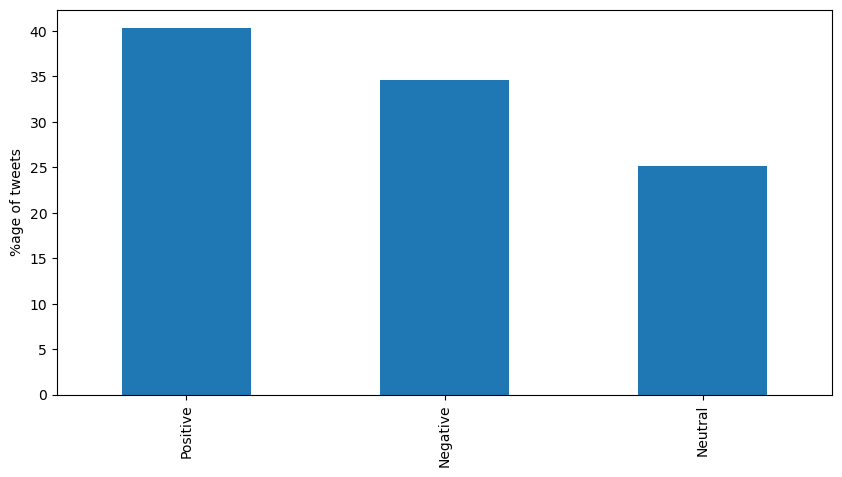

In [72]:
# Plot graph for analysis of Trump Tweets
plt.figure(figsize=(10,5)) 
(df_trump['sentiment'].value_counts(normalize=True)*100).plot.bar()
plt.ylabel("%age of tweets")
plt.show()

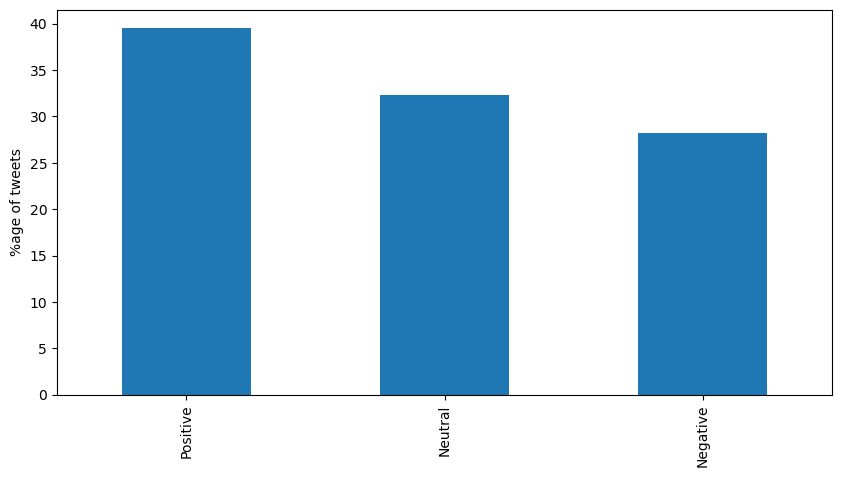

In [237]:
# Plot graph for analysis of Biden Tweets
plt.figure(figsize=(10,5)) 
(df_biden['sentiment'].value_counts(normalize=True)*100).plot.bar()
plt.ylabel("%age of tweets")
plt.show()

In [238]:
state_df = df_trump.groupby(['state','sentiment'])['text'].count().sort_values(ascending=False).reset_index(name='total_tweets')
state_df

,state,sentiment,total_tweets
0,California,Positive,237889
1,California,Negative,219873
2,Texas,Positive,190647
3,Florida,Positive,182091
4,California,Neutral,152896
...,...,...,...
145,North Dakota,Positive,1934
146,North Dakota,Negative,1735
147,Wyoming,Neutral,1595
148,West Virginia,Neutral,1462


# Sentiment % pos neg

In [78]:
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New York', 'New Mexico', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
stateCodes = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

stateMapping = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NY': 'New York', 'NM': 'New Mexico', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT':  'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV':  'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}

In [79]:

# Election data
df_elec = pd.read_csv('election_data.csv', sep=',')
df_elec = df_elec[['state', 'candidate', 'total_votes', 'won']]
df_elec = df_elec[((df_elec.candidate == 'Joe Biden') | (df_elec.candidate == 'Donald Trump')) & (df_elec.state != 'District of Columbia')]
df_elec = df_elec.groupby(['state', 'candidate'])['total_votes'].apply(sum).reset_index()

percentagelist = []
for state in states:
    bidentot = df_elec.loc[(df_elec['state'] == state) & (df_elec['candidate'] == 'Joe Biden')]['total_votes']
    trumptot = df_elec.loc[(df_elec['state'] == state) & (df_elec['candidate'] == 'Donald Trump')]['total_votes']
    bidenpercentage = int(bidentot) / (int(bidentot) + int(trumptot))
    trumppercentage = int(trumptot) / (int(bidentot) + int(trumptot))
    percentagelist.append(trumppercentage)
    percentagelist.append(bidenpercentage)
    
df_elec['ratio of votes'] = percentagelist


In [137]:
# Concat the data frames
df_trump['candidate'] = 'Trump'
df_biden['candidate'] = 'Biden'
Data_Mixed = pd.concat([df_trump,df_biden])
Data_Mixed

,id,text,retweet_count,favorite_count,date,verified,state,sentiment_scores,sentiment,candidate
1,1319111212194549761,rt @realdonaldtrump: just don’t see any way nancy pelosi and cryin’ chuck schumer will be willing to do what is right for our great america…,17984.0,0,10-22-03,False,Pennsylvania,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.6249}",Positive,Trump
2,1319111212672667648,rt @ddale8: it turns out trump has been making this false claim for seven years now https://t.co/s17ibtqg6c https://t.co/6nnunlaehq,462.0,0,10-22-03,False,New Jersey,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral,Trump
5,1319111212831887360,"rt @amy_siskind: note every bit of foreign interference has been to help trump and hurt biden. \n\nnote every bit of voter intimidation, vote…",694.0,0,10-22-03,False,Colorado,"{'neg': 0.215, 'neu': 0.692, 'pos': 0.093, 'compound': -0.5423}",Negative,Trump
6,1319111212853022721,"rt @donwinslow: hunter biden is not responsible for the deaths of 220,000 americans.\n\nbut donald trump is.",5215.0,0,10-22-03,False,Massachusetts,"{'neg': 0.085, 'neu': 0.915, 'pos': 0.0, 'compound': -0.1232}",Negative,Trump
20,1319111221858193408,"rt @cnnpolitics: republican sen. mitt romney: ""i did not vote for president trump"" https://t.co/nyiqfto31d https://t.co/wlumvhydrl",1155.0,0,10-22-03,False,Florida,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral,Trump
...,...,...,...,...,...,...,...,...,...,...
9447817,1323369258521251840,rt @timcast: i think its funny that people across the country are preparing for mass leftist riots and would also vote for joe biden whose…,4103.0,0,11-02-20,False,North Dakota,"{'neg': 0.117, 'neu': 0.78, 'pos': 0.103, 'compound': -0.1027}",Negative,Biden
9447820,1323369262099189763,rt @jimtankersley: a key diff for dems in 2020 vs. 2016: joe biden has quietly kept both his left flank and wall st from rebelling against…,130.0,0,11-02-20,True,Georgia,"{'neg': 0.08, 'neu': 0.92, 'pos': 0.0, 'compound': -0.2732}",Negative,Biden
9447821,1323369262141054976,rt @realdonaldtrump: biden will raise your taxes (biggest increase ever!).,12175.0,0,11-02-20,False,Illinois,"{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'compound': 0.3802}",Positive,Biden
9447831,1323369266251444233,rt @joebiden: are you still undecided about who to vote for or know someone who is? my team put together some cheat sheets to show where do…,18719.0,0,11-02-20,False,Maine,"{'neg': 0.164, 'neu': 0.836, 'pos': 0.0, 'compound': -0.5994}",Negative,Biden


In [138]:
# Percentage sentiment per state
state_sentiment_trump = {}
state_sentiment_biden = {}
for state in states:
    total_state = Data_Mixed[(Data_Mixed['state']==state)]['sentiment'].value_counts()
    # Trump
    d_t = Data_Mixed[(Data_Mixed['state']==state) & (Data_Mixed['candidate']=='Trump')]['sentiment'].value_counts()
    post= d_t['Positive'] / total_state
    negt= d_t['Negative'] / total_state
    # Biden
    d_b = Data_Mixed[(Data_Mixed['state']==state) & (Data_Mixed['candidate']=='Biden')]['sentiment'].value_counts()
    posb= d_b['Positive'] / total_state
    negb= d_b['Negative'] / total_state
       
    state_sentiment_trump[state] = {'positive' : post, 'negative': negt}
    state_sentiment_biden[state] = {'positive' : posb, 'negative': negb}
    
    


In [241]:
overview_df = pd.DataFrame()
overview_df['state'] = Data_Mixed.state.unique()


overview_df = overview_df.merge(Data_Mixed.groupby('state')['id'].count().reset_index(name="total_tweets"), on='state', how='left')
overview_df = overview_df.merge(Data_Mixed[(Data_Mixed['candidate'] == 'Trump') &
                                 (Data_Mixed['sentiment'] == 'Positive')].groupby('state')['id'].count().reset_index(name="Trump_P"), on='state', how='left')
overview_df = overview_df.merge(Data_Mixed[(Data_Mixed['candidate'] == 'Trump') &
                                 (Data_Mixed['sentiment'] == 'Negative')].groupby('state')['id'].count().reset_index(name="Trump_N"), on='state', how='left')
overview_df = overview_df.merge(Data_Mixed[(Data_Mixed['candidate'] == 'Trump') &
                                 (Data_Mixed['sentiment'] == 'Neutral')].groupby('state')['id'].count().reset_index(name="Trump_Na"), on='state', how='left')
overview_df = overview_df.merge(Data_Mixed[(Data_Mixed['candidate'] == 'Biden') &
                                 (Data_Mixed['sentiment'] == 'Positive')].groupby('state')['id'].count().reset_index(name="Biden_P"), on='state', how='left')
overview_df = overview_df.merge(Data_Mixed[(Data_Mixed['candidate'] == 'Biden') &
                                 (Data_Mixed['sentiment'] == 'Negative')].groupby('state')['id'].count().reset_index(name="Biden_N"), on='state', how='left')
overview_df = overview_df.merge(Data_Mixed[(Data_Mixed['candidate'] == 'Biden') &
                                 (Data_Mixed['sentiment'] == 'Neutral')].groupby('state')['id'].count().reset_index(name="Biden_Na"), on='state', how='left')

new_df

,state,total_tweets,Trump_P,Trump_N,Trump_Na,Biden_P,Biden_N,Biden_Na,Trump_P_perc_total,Trump_P_perc_only,Biden_P_perc_total,Biden_P_perc_only,winner
0,Pennsylvania,254404,63484,55171,40406,38226,26713,30404,0.249540,0.399117,0.150257,0.400931,Biden
1,New Jersey,162481,40968,35375,25372,24350,17160,19256,0.252140,0.402772,0.149864,0.400718,Trump
2,Colorado,143612,35116,33106,22356,21400,14664,16970,0.244520,0.387688,0.149013,0.403515,Biden
3,Massachusetts,153022,36289,35300,23833,23821,15550,18229,0.237149,0.380300,0.155670,0.413559,Biden
4,Florida,679529,182091,140167,108537,93633,74465,80636,0.267966,0.422686,0.137791,0.376438,Trump
5,Minnesota,106348,25830,24066,16846,16114,10804,12688,0.242882,0.387013,0.151521,0.406858,Biden
6,California,973653,237889,219873,152896,148577,97989,116429,0.244326,0.389562,0.152597,0.409309,Biden
7,Washington,305040,72305,68692,49123,47588,30219,37113,0.237034,0.380312,0.156006,0.414097,Biden
8,South Carolina,91249,24328,18559,14370,12768,10083,11141,0.266611,0.424891,0.139925,0.375618,Trump
9,Nevada,87471,22671,18780,13695,12656,9310,10359,0.259183,0.411109,0.144688,0.391524,Trump


In [242]:
overview_df['Trump_P_perc_total'] = overview_df['Trump_P'] / overview_df['total_tweets']
overview_df['Biden_P_perc_total'] = overview_df['Biden_P'] / overview_df['total_tweets']

overview_df['Trump_P_perc_only'] = overview_df['Trump_P'] / (overview_df['Trump_P'] + overview_df['Trump_N'] + overview_df['Trump_Na'])
overview_df['Biden_P_perc_only'] = overview_df['Biden_P'] / (overview_df['Biden_P'] + overview_df['Biden_N'] + overview_df['Biden_Na'])
overview_df

,state,total_tweets,Trump_P,Trump_N,Trump_Na,Biden_P,Biden_N,Biden_Na,Trump_P_perc_total,Biden_P_perc_total,Trump_P_perc_only,Biden_P_perc_only
0,Pennsylvania,254404,63484,55171,40406,38226,26713,30404,0.249540,0.150257,0.399117,0.400931
1,New Jersey,162481,40968,35375,25372,24350,17160,19256,0.252140,0.149864,0.402772,0.400718
2,Colorado,143612,35116,33106,22356,21400,14664,16970,0.244520,0.149013,0.387688,0.403515
3,Massachusetts,153022,36289,35300,23833,23821,15550,18229,0.237149,0.155670,0.380300,0.413559
4,Florida,679529,182091,140167,108537,93633,74465,80636,0.267966,0.137791,0.422686,0.376438
5,Minnesota,106348,25830,24066,16846,16114,10804,12688,0.242882,0.151521,0.387013,0.406858
6,California,973653,237889,219873,152896,148577,97989,116429,0.244326,0.152597,0.389562,0.409309
7,Washington,305040,72305,68692,49123,47588,30219,37113,0.237034,0.156006,0.380312,0.414097
8,South Carolina,91249,24328,18559,14370,12768,10083,11141,0.266611,0.139925,0.424891,0.375618
9,Nevada,87471,22671,18780,13695,12656,9310,10359,0.259183,0.144688,0.411109,0.391524


In [244]:
# put sentiments and election outcomes in list for plotting
positive_sentiments_states_trump = []
elec_result_states_trump = []
positive_sentiments_states_biden = []
elec_result_states_biden = []
for state in states:
    positive_sentiments_states_trump.append(state_sentiment_trump[state]['positive'])
    elec_result_states_trump.append(list(df_elec.loc[(df_elec['state'] == state) & (df_elec['candidate'] == 'Donald Trump')]['ratio of votes'])[0])
    positive_sentiments_states_biden.append(state_sentiment_biden[state]['positive'])
    elec_result_states_biden.append(list(df_elec.loc[(df_elec['state'] == state) & (df_elec['candidate'] == 'Joe Biden')]['ratio of votes'])[0])
    
    

In [245]:
negative_sentiments_states_trump = []
elec_result_states_trump = []
negative_sentiments_states_biden = []
elec_result_states_biden = []
for state in states:
    negative_sentiments_states_trump.append(state_sentiment_trump[state]['negative'])
    elec_result_states_trump.append(list(df_elec.loc[(df_elec['state'] == state) & (df_elec['candidate'] == 'Donald Trump')]['ratio of votes'])[0])
    negative_sentiments_states_biden.append(state_sentiment_biden[state]['negative'])
    elec_result_states_biden.append(list(df_elec.loc[(df_elec['state'] == state) & (df_elec['candidate'] == 'Joe Biden')]['ratio of votes'])[0])

In [250]:
import numpy as np
overview_df['winner'] = np.where(overview_df['Trump_P_perc_only'] > overview_df['Biden_P_perc_only'], 'Trump', 'Biden')
state_abb = []
for state in states:
    for k, v in stateMapping.items():
        if v == state:
            state_abb.append(k)
fig = px.choropleth(overview_df, color='winner', locations=state_abb, locationmode="USA-states", scope="usa")
fig.show()

SyntaxError: unmatched ')' (3627174934.py, line 2)

In [230]:
df =  pd.read_csv('Plotly/finalResult.csv', lineterminator='\n')
df = df.drop(['State'], axis=1)
df = df.rename(columns={'newST': 'State'})
df['Won election'] = df['won'].str.replace("T", "Trump").replace("B", "Biden")
#to get biden as blue 
d = {0: 2, 2: 0}
df = df.rename(d).sort_index()
#unnessarcy row
df = df.drop([52])

In [231]:
fig = px.choropleth(df, color='Won election', locations="State", locationmode="USA-states", scope="usa")

fig.show()

# Current plots

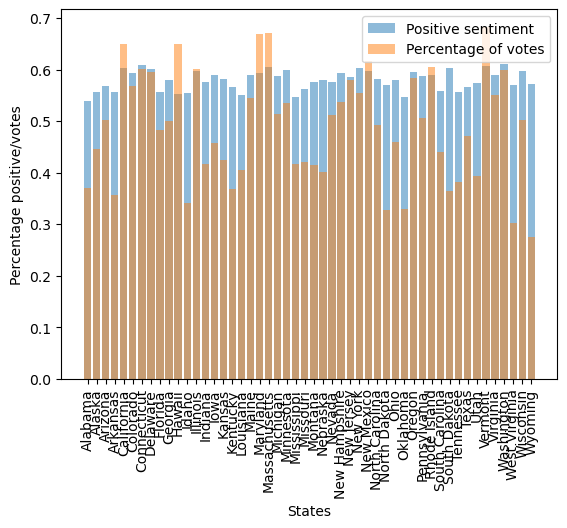

In [92]:
plt.bar(states, positive_sentiments_states_biden, alpha = 0.5, label="Positive sentiment")
plt.bar(states, elec_result_states_biden, alpha = 0.5, label = 'Percentage of votes')
plt.xticks(rotation=90)
plt.ylabel("Percentage positive/votes")
plt.xlabel("States")
plt.legend()
plt.show()

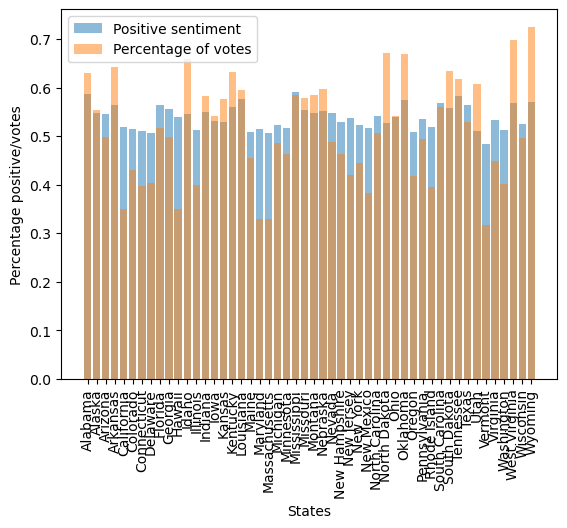

In [94]:
plt.bar(states, positive_sentiments_states_trump, alpha = 0.5, label="Positive sentiment")
plt.bar(states, elec_result_states_trump, alpha = 0.5, label = 'Percentage of votes')
plt.xticks(rotation=90)
plt.ylabel("Percentage positive/votes")
plt.xlabel("States")
plt.legend()
plt.show()